In [1]:
!pip install pycaret
from pycaret.utils import enable_colab
import pandas as pd
enable_colab()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 27.2 MB/s 
     |████████████████████████████████| 2.0 MB 50.2 MB/s 
     |████████████████████████████████| 1.7 MB 65.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 62.8 MB/s 
     |████████████████████████████████| 10.4 MB 57.3 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 17.0 MB 58.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 1.3 MB 52.3 MB/s 
     |████████████████████████████████| 268 kB 64.9 MB/s 
     |████████████████████████████████| 636 kB 60.7 MB/s 
     |████████████████████████████████

Colab mode enabled.


In [1]:
from pycaret.classification import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataset= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/brain_stroke.csv')

In [4]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
dataset.shape

(4981, 11)

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4732, 11)
Unseen Data For Predictions: (249, 11)


In [7]:
setup1 = setup(data = data, target = 'stroke', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   log_experiment = True, experiment_name = 'stroke',
                   use_gpu= True)

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4732, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/09/14 17:33:45 INFO mlflow.tracking.fluent: Experiment with name 'stroke' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='stroke',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume

In [8]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9490,0.8400,0.0000,0.0000,0.0000,0.0000,0.0000,0.045
svm,SVM - Linear Kernel,0.9490,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.030
ridge,Ridge Classifier,0.9490,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.031
dummy,Dummy Classifier,0.9490,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.008
rf,Random Forest Classifier,0.9475,0.7783,0.0059,0.0500,0.0105,0.0068,0.0111,1.137
ada,Ada Boost Classifier,0.9475,0.8127,0.0294,0.2900,0.0509,0.0436,0.0765,0.173
lda,Linear Discriminant Analysis,0.9457,0.8330,0.0353,0.3750,0.0633,0.0519,0.0966,0.026
gbc,Gradient Boosting Classifier,0.9453,0.8293,0.0235,0.1233,0.0387,0.0288,0.0371,0.393
knn,K Neighbors Classifier,0.9447,0.6088,0.0000,0.0000,0.0000,-0.0076,-0.0133,0.175
lightgbm,Light Gradient Boosting Machine,0.9432,0.8009,0.0471,0.2617,0.0762,0.0603,0.0855,0.101


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random

In [9]:
type(top3)
print(top3)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)]


In [10]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9050,0.5743,0.2059,0.1628,0.1818,0.1321,0.1331
1,0.8974,0.5564,0.1765,0.1304,0.1500,0.0967,0.0980
2,0.9033,0.6046,0.2727,0.1837,0.2195,0.1701,0.1739
3,0.8867,0.5091,0.0882,0.0638,0.0741,0.0154,0.0156
4,0.8988,0.5572,0.1765,0.1333,0.1519,0.0992,0.1003
Mean,0.8982,0.5603,0.1840,0.1348,0.1555,0.1027,0.1042
Std,0.0064,0.0310,0.0594,0.0406,0.0479,0.0511,0.0521


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [11]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.95,0.77,0.00,0.00,0.00,0.00,0.00
1,0.95,0.86,0.00,0.00,0.00,0.00,0.00
2,0.95,0.74,0.00,0.00,0.00,0.00,0.00
3,0.95,0.79,0.00,0.00,0.00,0.00,0.00
4,0.95,0.74,0.00,0.00,0.00,0.00,0.00
5,0.95,0.81,0.00,0.00,0.00,-0.01,-0.01
6,0.95,0.73,0.00,0.00,0.00,0.00,0.00
7,0.94,0.74,0.00,0.00,0.00,-0.02,-0.02
8,0.95,0.78,0.06,0.50,0.11,0.10,0.16


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7078,0.7922,0.8824,0.1364,0.2362,0.1619,0.2720
1,0.7801,0.8683,0.7647,0.1585,0.2626,0.1943,0.2789
2,0.7100,0.7627,0.6875,0.1078,0.1864,0.1123,0.1852
3,0.6556,0.8488,0.9412,0.1240,0.2192,0.1412,0.2631
4,0.6767,0.8610,0.8824,0.1250,0.2190,0.1418,0.2516
5,0.7160,0.8218,0.8235,0.1333,0.2295,0.1548,0.2531
6,0.7613,0.8423,0.8235,0.1556,0.2617,0.1919,0.2885
7,0.7492,0.7883,0.8824,0.1562,0.2655,0.1953,0.3037
8,0.7190,0.8106,0.7059,0.1200,0.2051,0.1286,0.2046


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [13]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5663,0.7158,0.8824,0.0955,0.1724,0.0882,0.1905
1,0.7620,0.7633,0.7647,0.1477,0.2476,0.1770,0.2630
2,0.6012,0.6718,0.7500,0.0857,0.1538,0.0735,0.1492
3,0.5468,0.7611,1.0000,0.1018,0.1848,0.1010,0.2306
4,0.5257,0.7500,1.0000,0.0977,0.1780,0.0932,0.2210
5,0.5831,0.7524,0.9412,0.1046,0.1882,0.1055,0.2235
6,0.6224,0.7731,0.9412,0.1143,0.2038,0.1235,0.2441
7,0.6042,0.7636,0.9412,0.1096,0.1963,0.1149,0.2344
8,0.6979,0.7295,0.7647,0.1193,0.2063,0.1289,0.2156


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,gini
max_depth,6
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_rf2, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,balanced
criterion,gini
max_depth,2
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8765,0.4897,0.0588,0.0385,0.0465,-0.0164,-0.0169
1,0.9096,0.5628,0.1765,0.1579,0.1667,0.1191,0.1193
2,0.9033,0.5339,0.1250,0.1000,0.1111,0.0607,0.0611
3,0.8943,0.5270,0.1176,0.0909,0.1026,0.0474,0.0478
4,0.9094,0.5349,0.1176,0.1176,0.1176,0.0699,0.0699
5,0.8852,0.5500,0.1765,0.1111,0.1364,0.0783,0.0807
6,0.9063,0.5890,0.2353,0.1818,0.2051,0.1562,0.1577
7,0.8882,0.4960,0.0588,0.0455,0.0513,-0.0071,-0.0071
8,0.9184,0.6510,0.3529,0.2727,0.3077,0.2651,0.2676


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [17]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9458,0.6618,0.0000,0.0000,0.0000,-0.0057,-0.0128
1,0.9458,0.7276,0.0000,0.0000,0.0000,-0.0057,-0.0128
2,0.9486,0.6745,0.0000,0.0000,0.0000,-0.0057,-0.0124
3,0.9396,0.7090,0.0588,0.2000,0.0909,0.0692,0.0834
4,0.9486,0.6045,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9456,0.7470,0.1176,0.4000,0.1818,0.1623,0.1956
6,0.9396,0.6986,0.0000,0.0000,0.0000,-0.0156,-0.0223
7,0.9245,0.7163,0.0000,0.0000,0.0000,-0.0340,-0.0366
8,0.9486,0.6877,0.1176,0.5000,0.1905,0.1743,0.2248


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [18]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [19]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8976,0.5008,0.0588,0.0526,0.0556,0.0016,0.0016
1,0.9066,0.5891,0.2353,0.1818,0.2051,0.1564,0.1579
2,0.9094,0.5371,0.1250,0.1111,0.1176,0.0701,0.0702
3,0.8792,0.5190,0.1176,0.0741,0.0909,0.0298,0.0307
4,0.9003,0.5580,0.1765,0.1364,0.1538,0.1018,0.1028
5,0.8792,0.5190,0.1176,0.0741,0.0909,0.0298,0.0307
6,0.9184,0.5954,0.2353,0.2222,0.2286,0.1855,0.1856
7,0.8912,0.5532,0.1765,0.1200,0.1429,0.0870,0.0889
8,0.9154,0.6772,0.4118,0.2800,0.3333,0.2899,0.2961


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [20]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.7389,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9398,0.7979,0.0000,0.0000,0.0000,-0.0156,-0.0222
2,0.9517,0.7519,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9456,0.7997,0.0588,0.3333,0.1000,0.0859,0.1222
4,0.9486,0.7536,0.0588,0.5000,0.1053,0.0955,0.1585
5,0.9366,0.8147,0.0000,0.0000,0.0000,-0.0200,-0.0257
6,0.9456,0.7474,0.0000,0.0000,0.0000,-0.0057,-0.0128
7,0.9335,0.7736,0.0000,0.0000,0.0000,-0.0239,-0.0288
8,0.9486,0.8185,0.0588,0.5000,0.1053,0.0955,0.1585


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [21]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: Light Gradient Boosting Machine
INFO:logs:logged params: {'boosting_type': 'gbdt', 'class_weight': 

In [22]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9398,0.7660,0.0000,0.0000,0.0000,-0.0156,-0.0222
1,0.9337,0.8624,0.0000,0.0000,0.0000,-0.0238,-0.0287
2,0.9486,0.7528,0.0000,0.0000,0.0000,-0.0057,-0.0124
3,0.9486,0.8188,0.0588,0.5000,0.1053,0.0955,0.1585
4,0.9456,0.8381,0.0000,0.0000,0.0000,-0.0057,-0.0128
5,0.9396,0.8271,0.1765,0.3333,0.2308,0.2024,0.2136
6,0.9396,0.8501,0.0588,0.2000,0.0909,0.0692,0.0834
7,0.9335,0.7971,0.0000,0.0000,0.0000,-0.0239,-0.0288
8,0.9396,0.8481,0.0588,0.2000,0.0909,0.0692,0.0834


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [23]:
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9398,0.0,0.0000,0.0000,0.0000,-0.0156,-0.0222
2,0.9486,0.0,0.0000,0.0000,0.0000,-0.0057,-0.0124
3,0.9517,0.0,0.0588,1.0000,0.1111,0.1060,0.2366
4,0.9456,0.0,0.0000,0.0000,0.0000,-0.0057,-0.0128
5,0.9456,0.0,0.0588,0.3333,0.1000,0.0859,0.1222
6,0.9517,0.0,0.0588,1.0000,0.1111,0.1060,0.2366
7,0.9396,0.0,0.0000,0.0000,0.0000,-0.0156,-0.0223
8,0.9486,0.0,0.0588,0.5000,0.1053,0.0955,0.1585


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [24]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9488,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9517,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9486,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9486,0.0,0.0,0.0,0.0,0.0,0.0
5,0.9486,0.0,0.0,0.0,0.0,0.0,0.0
6,0.9486,0.0,0.0,0.0,0.0,0.0,0.0
7,0.9486,0.0,0.0,0.0,0.0,0.0,0.0
8,0.9486,0.0,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
 

In [25]:
print(blender_top3.estimators_)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)]


In [26]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.7886,0.0000,0.00,0.0000,0.0000,0.0000
1,0.9488,0.8706,0.0000,0.00,0.0000,0.0000,0.0000
2,0.9517,0.7718,0.0000,0.00,0.0000,0.0000,0.0000
3,0.9486,0.8490,0.0000,0.00,0.0000,0.0000,0.0000
4,0.9486,0.8717,0.0000,0.00,0.0000,0.0000,0.0000
5,0.9486,0.8852,0.0000,0.00,0.0000,0.0000,0.0000
6,0.9486,0.8610,0.0000,0.00,0.0000,0.0000,0.0000
7,0.9486,0.8348,0.0000,0.00,0.0000,0.0000,0.0000
8,0.9486,0.8222,0.0588,0.50,0.1053,0.0955,0.1585


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                           

In [27]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.7669,0.0000,0.00,0.0000,0.0000,0.0000
1,0.9488,0.8624,0.0000,0.00,0.0000,0.0000,0.0000
2,0.9517,0.7371,0.0000,0.00,0.0000,0.0000,0.0000
3,0.9486,0.7890,0.0000,0.00,0.0000,0.0000,0.0000
4,0.9486,0.7436,0.0000,0.00,0.0000,0.0000,0.0000
5,0.9456,0.8070,0.0000,0.00,0.0000,-0.0057,-0.0128
6,0.9486,0.7315,0.0000,0.00,0.0000,0.0000,0.0000
7,0.9396,0.7387,0.0000,0.00,0.0000,-0.0156,-0.0223
8,0.9486,0.7837,0.0588,0.50,0.1053,0.0955,0.1585


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


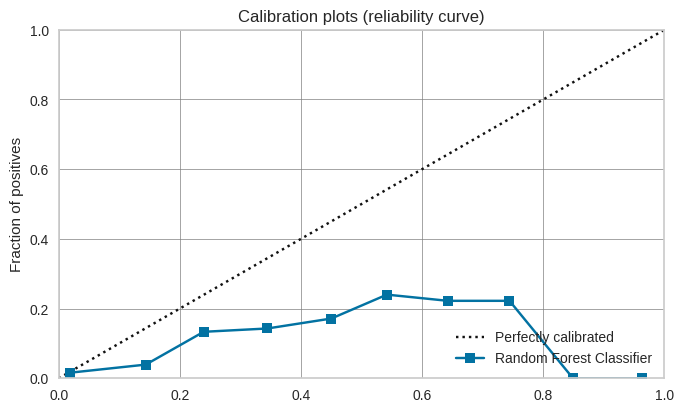

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(rf, plot='calibration')

In [29]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.7619,0.0,0.0,0.0,0.0000,0.0000
1,0.9488,0.8592,0.0,0.0,0.0,0.0000,0.0000
2,0.9517,0.7144,0.0,0.0,0.0,0.0000,0.0000
3,0.9486,0.8340,0.0,0.0,0.0,0.0000,0.0000
4,0.9486,0.8035,0.0,0.0,0.0,0.0000,0.0000
5,0.9486,0.8140,0.0,0.0,0.0,0.0000,0.0000
6,0.9486,0.7579,0.0,0.0,0.0,0.0000,0.0000
7,0.9396,0.7872,0.0,0.0,0.0,-0.0156,-0.0223
8,0.9456,0.8155,0.0,0.0,0.0,-0.0057,-0.0128


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

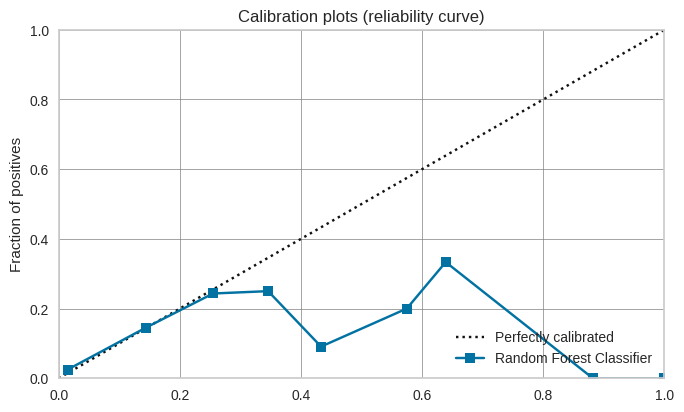

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(calibrated_rf, plot='calibration')

In [31]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.7681,0.0,0.0,0.0,0.0,0.0
1,0.9488,0.8652,0.0,0.0,0.0,0.0,0.0
2,0.9517,0.7245,0.0,0.0,0.0,0.0,0.0
3,0.9486,0.8230,0.0,0.0,0.0,0.0,0.0
4,0.9486,0.8135,0.0,0.0,0.0,0.0,0.0
5,0.9486,0.8194,0.0,0.0,0.0,0.0,0.0
6,0.9486,0.7656,0.0,0.0,0.0,0.0,0.0
7,0.9486,0.7919,0.0,0.0,0.0,0.0,0.0
8,0.9486,0.8239,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

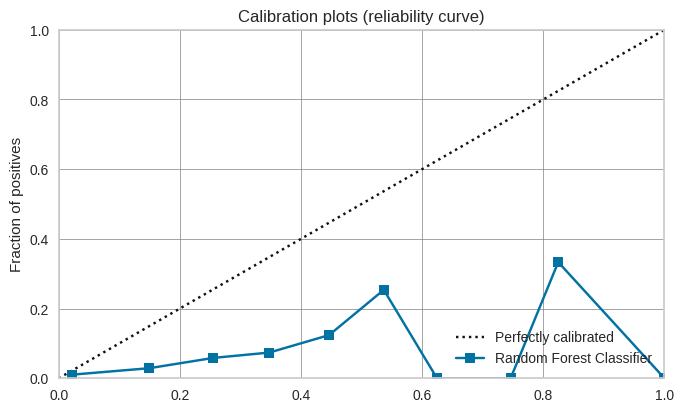

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [33]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 26.9 MB/s 
     |████████████████████████████████| 212 kB 65.3 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 112 kB 66.5 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 2.3 MB 61.1 MB/s 
     |████████████████████████████████| 57 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 270 kB 70.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 856 kB 64.4 MB/s 
     |████████████████████████████████| 594 kB 6

In [34]:
create_app(rf)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       gender   age  hypertension  heart_disease ever_married      work_type  \
0     Female  47.0             0              0          Yes        Private   
1       Male  24.0             0              0           No        Private   
2       Male   9.0             0              0           No       children   
3     Female  31.0             0              0          Yes       Govt_job   
4     Female  66.0             0              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
4727  Female   8.0             0              0           No       children   
4728  Female  70.0             1              0          Yes  Self-employed   
4729    Male  72.0             1              0          Yes  Self-employed   
4730  Female  47.0             0              0          Y

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://27545.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f16a1818cd0>,
 'http://127.0.0.1:7860/',
 'https://27545.gradio.app')